In [430]:
# import semua lib yang diperlukan
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split
#import requests
#import json
#from types import SimpleNamespace
# from pandas.io.json import json_normalize

In [472]:
# read file csv
df = pd.read_csv('dataset/minyak goreng kemasan.csv')
# ambil data dari API Priangan
#r = requests.get('http://dev.priangan.org/api/api/graphic_data/2/1/day/price/2012-01-01/2021-2-15/0/city/-/eceran/null')
#df = r.json()
df

,status,message,data__total,data__result__value,data__result__time,data__result__date,data__result__span,data__average,data__location_id,data__commodity_id,data__legend,data__commodity_name,stat__|,stat__|__total,stat__|__nb_data,stat__|__avg
0,ok,NaN,28911125.0,8325,"January 3, 2009",2009-01-03,3,12959.0,1.0,7.0,Harga Kota Bandung,Minyak Goreng (Kemasan),"January 3, 2009",8325,1,8325
1,NaN,NaN,NaN,8325,"January 4, 2009",2009-01-04,4,NaN,NaN,NaN,NaN,NaN,"January 4, 2009",8325,1,8325
2,NaN,NaN,NaN,8325,"January 5, 2009",2009-01-05,5,NaN,NaN,NaN,NaN,NaN,"January 5, 2009",8325,1,8325
3,NaN,NaN,NaN,8325,"January 6, 2009",2009-01-06,6,NaN,NaN,NaN,NaN,NaN,"January 6, 2009",8325,1,8325
4,NaN,NaN,NaN,8325,"January 7, 2009",2009-01-07,7,NaN,NaN,NaN,NaN,NaN,"January 7, 2009",8325,1,8325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,NaN,NaN,NaN,14700,"March 2, 2020",2020-03-02,62,NaN,NaN,NaN,NaN,NaN,"March 2, 2020",14700,1,14700
2227,NaN,NaN,NaN,14700,"March 3, 2020",2020-03-03,63,NaN,NaN,NaN,NaN,NaN,"March 3, 2020",14700,1,14700
2228,NaN,NaN,NaN,14700,"March 4, 2020",2020-03-04,64,NaN,NaN,NaN,NaN,NaN,"March 4, 2020",14700,1,14700
2229,NaN,NaN,NaN,15000,"March 5, 2020",2020-03-05,65,NaN,NaN,NaN,NaN,NaN,"March 5, 2020",15000,1,15000


In [473]:
#(hapus data yang tidak terpakai)
df.drop(['status','message','data__total','data__result__time','data__result__span','data__average','data__location_id','data__commodity_id','data__legend','data__commodity_name','stat__|','stat__|__total','stat__|__nb_data','stat__|__avg'], axis=1, inplace=True)
df

,data__result__value,data__result__date
0,8325,2009-01-03
1,8325,2009-01-04
2,8325,2009-01-05
3,8325,2009-01-06
4,8325,2009-01-07
...,...,...
2226,14700,2020-03-02
2227,14700,2020-03-03
2228,14700,2020-03-04
2229,15000,2020-03-05


In [474]:
# ubah nama kolom jadi Y dan DS
df.columns=['y','ds']
df

,y,ds
0,8325,2009-01-03
1,8325,2009-01-04
2,8325,2009-01-05
3,8325,2009-01-06
4,8325,2009-01-07
...,...,...
2226,14700,2020-03-02
2227,14700,2020-03-03
2228,14700,2020-03-04
2229,15000,2020-03-05


In [475]:
#ubah index jadi tanggal dengan format datetime
df.index = pd.to_datetime(df.ds)
#df = df.drop('ds', axis=1)
#df = df.sort_index()
df

,y,ds
ds,,
2009-01-03,8325,2009-01-03
2009-01-04,8325,2009-01-04
2009-01-05,8325,2009-01-05
2009-01-06,8325,2009-01-06
2009-01-07,8325,2009-01-07
...,...,...
2020-03-02,14700,2020-03-02
2020-03-03,14700,2020-03-03
2020-03-04,14700,2020-03-04


In [476]:
# resampling = fill tanggal yang ke skip
df = df.resample('D').mean()
df['y'] = df.interpolate()
df['ds'] = df.index
#df.y.fillna(method='ffill', inplace=True)
df

,y,ds
ds,,
2009-01-03,8325.0,2009-01-03
2009-01-04,8325.0,2009-01-04
2009-01-05,8325.0,2009-01-05
2009-01-06,8325.0,2009-01-06
2009-01-07,8325.0,2009-01-07
...,...,...
2020-03-04,14700.0,2020-03-04
2020-03-05,15000.0,2020-03-05
2020-03-06,14900.0,2020-03-06


In [477]:
df.index = pd.to_datetime(df.index)
print(df.index)

DatetimeIndex(['2009-01-03', '2009-01-04', '2009-01-05', '2009-01-06',
               '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-10',
               '2009-01-11', '2009-01-12',
               ...
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08'],
              dtype='datetime64[ns]', name='ds', length=4083, freq='D')


In [478]:
# drop nilai 0 kalo pake MAPE
df = df[(df != 0).all(1)]

In [479]:
# kalo mau export data ke csv
#df.to_csv("cleaned.csv", index=False, header=False)

In [480]:
# Split data training dan testing 70:30
# split_date = "2019-01-01"
# df_train = df.loc[df.ds <= split_date].copy() 
# df_test = df.loc[df.ds > split_date].copy()
# df_train.tail()
df_train = df[:int(df.shape[0]*0.7)]
df_test = df[int(df.shape[0]*0.7):]
print(df.shape, df_train.shape, df_test.shape)

(4079, 2) (2855, 2) (1224, 2)


In [481]:
# fitting model
m = Prophet()
m.add_country_holidays(country_name = 'ID')
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\azra\anaconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


In [482]:
# bikin prediksi dari model yang udah dibuat
forecast = m.predict(df_test)
# forecast = m.make_future_dataframe(periods = 90)
forecast.tail()

C:\Users\azra\anaconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
C:\Users\azra\anaconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascension of Jesus,Ascension of Jesus_lower,Ascension of Jesus_upper,Ascension of the Prophet,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1219,2020-03-04,14779.657955,-11647.378920,43063.868209,-11667.393551,43456.202329,0.0,0.0,0.0,0.0,...,7.979882,7.979882,7.979882,-95.538717,-95.538717,-95.538717,0.0,0.0,0.0,14692.099120
1220,2020-03-05,14780.085573,-11807.831811,43554.079493,-11718.338021,43497.268506,0.0,0.0,0.0,0.0,...,18.705752,18.705752,18.705752,-88.697852,-88.697852,-88.697852,0.0,0.0,0.0,14710.093473
1221,2020-03-06,14780.513190,-11698.189371,43477.192470,-11769.282491,43538.334682,0.0,0.0,0.0,0.0,...,-23.793680,-23.793680,-23.793680,-79.765151,-79.765151,-79.765151,0.0,0.0,0.0,14676.954359
1222,2020-03-07,14780.940808,-11656.928360,43762.531917,-11820.226960,43579.400859,0.0,0.0,0.0,0.0,...,-3.780998,-3.780998,-3.780998,-68.699729,-68.699729,-68.699729,0.0,0.0,0.0,14708.460080
1223,2020-03-08,14781.368425,-11733.777564,43553.498866,-11871.171430,43620.467035,0.0,0.0,0.0,0.0,...,-58.655519,-58.655519,-58.655519,-55.506095,-55.506095,-55.506095,0.0,0.0,0.0,14667.206811


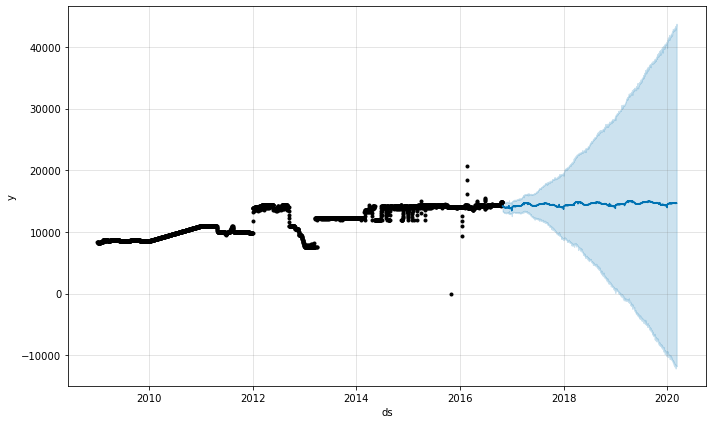

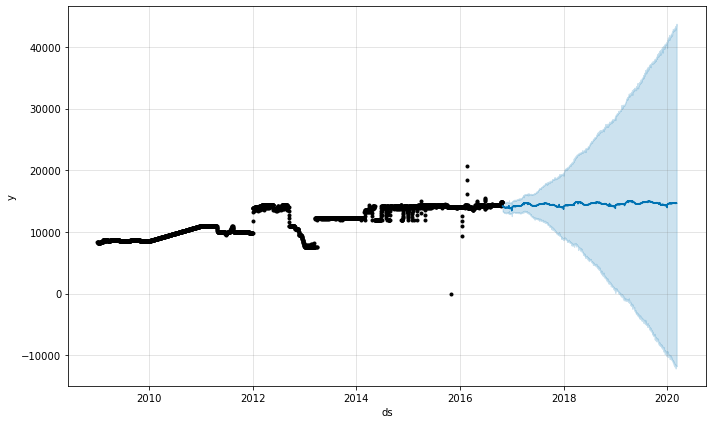

In [483]:
m.plot(forecast)

C:\Users\azra\anaconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
C:\Users\azra\anaconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


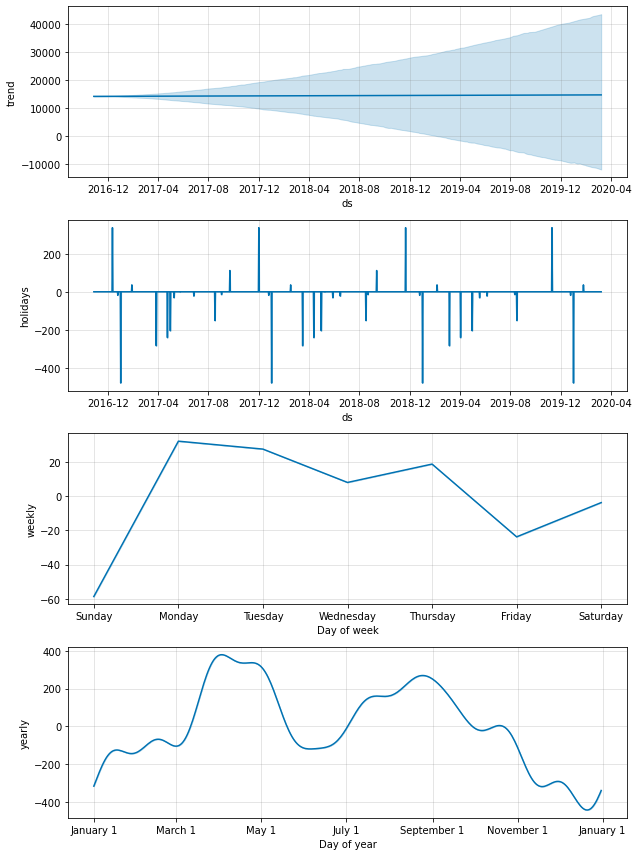

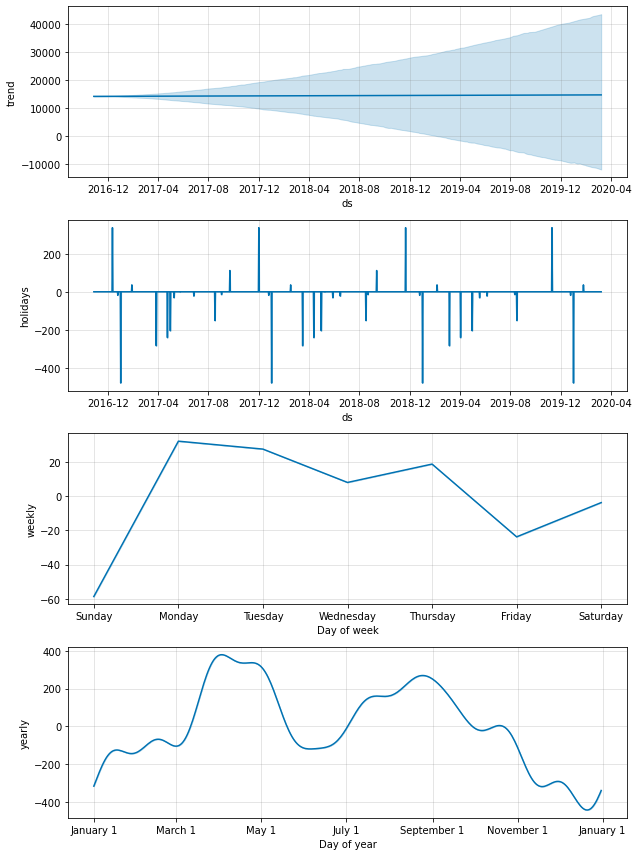

In [484]:
m.plot_components(forecast)

In [485]:
#itung MSE
mse = mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat'])
mse

1217086.0440743596

In [486]:
#itung MAE
mae = mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat'])
mae


371.88893330939294

In [487]:
#itung MAPE
def mean_abs_perc_err(y_true, y_pred) :
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_abs_perc_err(y_true = np.asarray(df_test['y']), y_pred = np.asarray(forecast['yhat']))
mape

2.485885293935837

In [488]:
#itung akurasi
akurasi = 100 - mape
akurasi

97.51411470606416

In [489]:
np.where(df_test['y'] == 0)

(array([], dtype=int64),)